In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
location = "datasets/kickstarter.csv"
df = pd.read_csv(location)
df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [3]:
df.describe()

,Unnamed: 0,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real
count,702411.000000,7.024110e+05,7.024110e+05,7.024110e+05,702411.000000,6.948170e+05,3.786610e+05,3.786610e+05
mean,351205.000000,1.074829e+09,4.817642e+04,9.223828e+03,103.726589,7.405969e+03,4.545440e+04,9.058924e+03
std,202768.734302,6.192006e+08,1.162920e+06,9.286016e+04,919.654297,8.144094e+04,1.152950e+06,9.097334e+04
min,0.000000,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00
25%,175602.500000,5.379594e+08,2.000000e+03,3.000000e+01,2.000000,2.024000e+01,2.000000e+03,3.100000e+01
50%,351205.000000,1.075562e+09,5.000000e+03,6.150000e+02,12.000000,4.560000e+02,5.500000e+03,6.243300e+02
75%,526807.500000,1.610544e+09,1.505600e+04,4.020000e+03,55.000000,3.261000e+03,1.550000e+04,4.050000e+03
max,702410.000000,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2.033899e+07


In [4]:
df1 = df.drop('Unnamed: 0', axis=1)
df1.head()
#I saw that the Unnamed column wasn't providing any useful info so I dropped it

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [5]:
df1.isnull().sum()

ID                       0
name                     8
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged           7594
usd_goal_real       323750
usd_pledged_real    323750
dtype: int64

In [6]:
df2 = df1.dropna()
#drop all the rows with missing values, so all the companies can be reviewed equally

In [7]:
df2['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'], dtype=object)

In [18]:
def score_to_numeric(x):
    if x=='canceled':
        return 4
    if x=='suspended':
        return 3
    if x=='failed':
        return 2
    if x=='live':
        return 1
    if x=='successful':
        return 0
    
df2['state_val'] = df2['state'].apply(score_to_numeric)
df2.head()
#set numeric values to state in hopes to remove failied and cancelled companies

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,state_val
323750,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:28,2015-10-09 00:00:00,0,0.0,1533.95,0.0,2
323751,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,US,failed,30000.0,2421.0,USD,2017-09-02 04:43:57,2017-11-01 00:00:00,15,100.0,30000.00,2421.0,2
323752,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:50,2013-02-26 00:00:00,3,220.0,45000.00,220.0,2
323753,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:11,2012-04-16 00:00:00,1,1.0,5000.00,1.0,2
323754,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:03,2015-08-29 00:00:00,14,1283.0,19500.00,1283.0,4


In [19]:
df3 = df2[['name' , 'main_category' , 'state_val',
           'goal' , 'pledged' , 'backers', 'deadline']]

In [20]:
df3

,name,main_category,state_val,goal,pledged,backers,deadline
323750,The Songs of Adelaide & Abullah,Publishing,2,1000.0,0.00,0,2015-10-09 00:00:00
323751,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2,30000.0,2421.00,15,2017-11-01 00:00:00
323752,Where is Hank?,Film & Video,2,45000.0,220.00,3,2013-02-26 00:00:00
323753,ToshiCapital Rekordz Needs Help to Complete Album,Music,2,5000.0,1.00,1,2012-04-16 00:00:00
323754,Community Film Project: The Art of Neighborhoo...,Film & Video,4,19500.0,1283.00,14,2015-08-29 00:00:00
323755,Monarch Espresso Bar,Food,0,50000.0,52375.00,224,2016-04-01 00:00:00
323756,Support Solar Roasted Coffee & Green Energy! ...,Food,0,1000.0,1205.00,16,2014-12-21 00:00:00
323757,Chaser Strips. Our Strips make Shots their B*tch!,Food,2,25000.0,453.00,40,2016-03-17 00:00:00
323758,SPIN - Premium Retractable In-Ear Headphones w...,Design,4,125000.0,8233.00,58,2014-05-29 00:00:00
323759,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,4,65000.0,6240.57,43,2014-08-10 00:00:00


In [25]:
#df4 = df3.drop('state')
df4 = df3.loc[df3['state_val'] < 2 ]

In [26]:
df4

,name,main_category,state_val,goal,pledged,backers,deadline
323755,Monarch Espresso Bar,Food,0,50000.0,52375.00,224,2016-04-01 00:00:00
323756,Support Solar Roasted Coffee & Green Energy! ...,Food,0,1000.0,1205.00,16,2014-12-21 00:00:00
323761,Lisa Lim New CD!,Music,0,12500.0,12700.00,100,2013-04-08 00:00:00
323764,Tombstone: Old West tabletop game and miniatur...,Games,0,5000.0,94175.00,761,2017-05-03 00:00:00
323768,Mike Corey's Darkness & Light Album,Music,0,250.0,250.00,7,2012-08-17 00:00:00
323770,CMUK. Shoes: Take on Life Feet First.,Fashion,0,20000.0,34268.00,624,2013-12-30 00:00:00
323774,The Book Zoo - A Mini-Comic,Comics,0,175.0,701.66,66,2014-11-12 00:00:00
323775,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,0,10000.0,15827.00,147,2011-01-06 00:00:00
323777,Permaculture Skills,Film & Video,0,17757.0,48905.00,571,2014-12-14 00:00:00
323778,Rebel Army Origins: The Heroic Story Of Major ...,Comics,0,100.0,112.38,27,2016-01-28 00:00:00


In [28]:
df5 = df4.loc[df3['backers'] > 500 ]

In [29]:
df5

,name,main_category,state_val,goal,pledged,backers,deadline
323764,Tombstone: Old West tabletop game and miniatur...,Games,0,5000.0,94175.00,761,2017-05-03 00:00:00
323770,CMUK. Shoes: Take on Life Feet First.,Fashion,0,20000.0,34268.00,624,2013-12-30 00:00:00
323777,Permaculture Skills,Film & Video,0,17757.0,48905.00,571,2014-12-14 00:00:00
323779,My Moon - Animated Short Film,Film & Video,0,50000.0,57577.31,840,2017-05-03 00:00:00
323781,Ledr workbook: one tough journal!,Design,0,1000.0,47266.00,549,2016-10-08 00:00:00
323796,Hot Chicken Takes Over.,Food,0,40000.0,63401.00,855,2014-10-16 00:00:00
323800,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Film & Video,0,60000.0,61365.16,632,2014-02-05 00:00:00
323813,HIIT Bottle™,Food,0,15000.0,124998.00,2784,2015-04-27 00:00:00
323855,"""Eat Like A Gilmore"" Cookbook",Food,0,20000.0,47273.00,1261,2016-04-17 00:00:00
323873,Wordwright: re·de·fin·ing word play,Games,0,2000.0,14794.00,624,2015-12-29 00:00:00


In [31]:
df5.sort_values('backers')
#Sort data based on asending order of backers values

,name,main_category,state_val,goal,pledged,backers,deadline
666060,Wine Diagram Poster,Design,0,1000.0,22115.00,501,2014-12-12
569532,Zelos: Swiss Automatic Watches Unlike Any Other,Design,0,30000.0,333566.10,501,2017-04-01
421998,The Unadoptables,Comics,0,6000.0,13807.00,501,2017-07-11
346467,Bicycle® TATTOO Golden Edition Playing Cards,Design,0,8000.0,15331.00,501,2014-04-01
489947,The Pro Brewers Siphon - A Home Brewing Essent...,Design,0,30000.0,36115.99,501,2016-05-31
534812,Dragon Racer,Games,0,3000.0,23388.00,501,2014-12-11
424437,The Easy Breezy Messenger Bag - For Everybody ...,Design,0,20000.0,51195.00,501,2017-04-24
636398,HAVANA MOTOR CLUB - A DOCUMENTARY,Film & Video,0,52250.0,59805.00,501,2014-05-04
345076,bladeRF - USB 3.0 Software Defined Radio,Technology,0,100000.0,191422.49,501,2013-02-28
417798,Luxury Watches Made in Germany - Manufaktur Wa...,Fashion,0,8000.0,189600.11,501,2017-08-26


In [32]:
df5.corr()

,state_val,goal,pledged,backers
state_val,1.000000,0.006463,-0.002947,-0.004510
goal,0.006463,1.000000,0.446424,0.396951
pledged,-0.002947,0.446424,1.000000,0.689108
backers,-0.004510,0.396951,0.689108,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

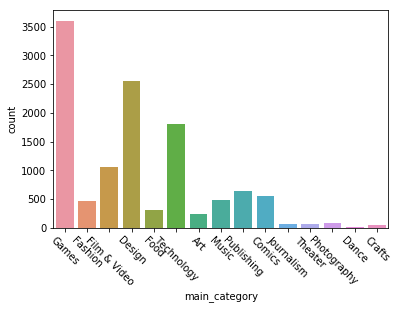

In [36]:
sns.countplot(x='main_category',
              data=df5)

plt.xticks(rotation=-45)


In [37]:
df5['main_category'].unique()

array(['Games', 'Fashion', 'Film & Video', 'Design', 'Food', 'Technology',
       'Art', 'Music', 'Publishing', 'Comics', 'Journalism', 'Theater',
       'Photography', 'Dance', 'Crafts'], dtype=object)

In [50]:
def score_to_numeric(x):
    if x=='Games':
        return 1
    if x=='Fashion':
        return 2
    if x=='Film & Video':
        return 3
    if x=='Design':
        return 4
    if x=='Food':
        return 0
    if x=='Art':
        return 0
    if x=='Music':
        return 0
    if x=='Comics':
        return 5
    if x=='Journalism':
        return 6
    if x=='Theater':
        return 0
    if x=='Photography':
        return 0
    if x=='Dance':
        return 0
    if x=='Crafts':
        return 0
    if x=='Publishing':
        return 7
    
df5['main_cat_val'] = df5['main_category'].apply(score_to_numeric)
df5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,main_category,state_val,goal,pledged,backers,deadline,main_cat_val
323764,Tombstone: Old West tabletop game and miniatur...,Games,0,5000.0,94175.00,761,2017-05-03 00:00:00,1.0
323770,CMUK. Shoes: Take on Life Feet First.,Fashion,0,20000.0,34268.00,624,2013-12-30 00:00:00,2.0
323777,Permaculture Skills,Film & Video,0,17757.0,48905.00,571,2014-12-14 00:00:00,3.0
323779,My Moon - Animated Short Film,Film & Video,0,50000.0,57577.31,840,2017-05-03 00:00:00,3.0
323781,Ledr workbook: one tough journal!,Design,0,1000.0,47266.00,549,2016-10-08 00:00:00,4.0


In [51]:
df6 = df5.dropna()

In [57]:
df7 = df6.loc[df6['main_cat_val'] >= 1 ]

In [58]:
df7

,name,main_category,state_val,goal,pledged,backers,deadline,main_cat_val
323764,Tombstone: Old West tabletop game and miniatur...,Games,0,5000.0,94175.00,761,2017-05-03 00:00:00,1.0
323770,CMUK. Shoes: Take on Life Feet First.,Fashion,0,20000.0,34268.00,624,2013-12-30 00:00:00,2.0
323777,Permaculture Skills,Film & Video,0,17757.0,48905.00,571,2014-12-14 00:00:00,3.0
323779,My Moon - Animated Short Film,Film & Video,0,50000.0,57577.31,840,2017-05-03 00:00:00,3.0
323781,Ledr workbook: one tough journal!,Design,0,1000.0,47266.00,549,2016-10-08 00:00:00,4.0
323800,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Film & Video,0,60000.0,61365.16,632,2014-02-05 00:00:00,3.0
323873,Wordwright: re·de·fin·ing word play,Games,0,2000.0,14794.00,624,2015-12-29 00:00:00,1.0
323912,"Packable, Fashionable & Protective; the ULTIMA...",Fashion,0,36000.0,91003.67,750,2014-06-07 00:00:00,2.0
323925,"Air Bonsai | Create your ""little star""",Design,0,80000.0,843743.00,3784,2016-03-01 00:00:00,4.0
324061,"Chill Puck - Keep your beverage colder, longer.",Design,0,7500.0,41759.00,1127,2013-05-08 00:00:00,4.0


In [59]:
df7.sort_values('main_cat_val')

,name,main_category,state_val,goal,pledged,backers,deadline,main_cat_val
323764,Tombstone: Old West tabletop game and miniatur...,Games,0,5000.0,94175.00,761,2017-05-03 00:00:00,1.0
521716,KOBOLDS ATE MY BABY! IN COLOR!!!,Games,0,11000.0,65817.56,1190,2013-04-03,1.0
521683,The Big Book of Maps (for Tabletop Roleplaying...,Games,0,1000.0,23562.00,947,2017-04-01,1.0
521674,Dungeon Heroes - Your Lunch Break Dungeon Crawl,Games,0,15000.0,22302.00,516,2012-12-03,1.0
521518,Buddy & Me,Games,0,40000.0,42093.01,1031,2013-04-21,1.0
521234,COLUMNAE: A Past Under Construction,Games,0,40000.0,41807.76,1039,2016-08-10,1.0
521216,Scion 2nd Edition Tabletop RPG,Games,0,25000.0,334714.00,4085,2016-10-22,1.0
520715,Cheers Or Tears,Games,0,10000.0,32786.69,1269,2017-10-21,1.0
520711,Paperback - a Novel Deckbuilding Game,Games,0,5000.0,37493.77,1071,2013-07-16,1.0
520429,Molecular - The Strategic Chemistry Tile Game,Games,0,15000.0,17981.00,537,2015-07-29,1.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

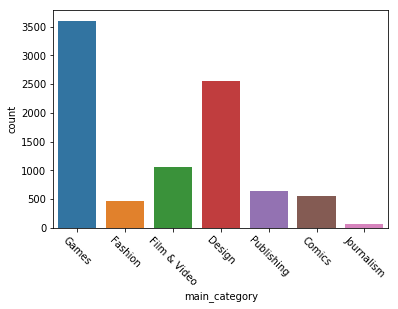

In [60]:
sns.countplot(x='main_category',
              data=df7)

plt.xticks(rotation=-45)

In [61]:
df7.corr()

,state_val,goal,pledged,backers,main_cat_val
state_val,1.000000,-0.004520,-0.005297,-0.003791,0.034118
goal,-0.004520,1.000000,0.447321,0.431012,-0.034390
pledged,-0.005297,0.447321,1.000000,0.700526,-0.028179
backers,-0.003791,0.431012,0.700526,1.000000,-0.065193
main_cat_val,0.034118,-0.034390,-0.028179,-0.065193,1.000000


In [62]:
writer = pd.ExcelWriter('dataframe7.xlsx', engine='xlsxwriter')
df7.to_excel(writer, sheet_name='KS7')
writer.save()